In [95]:
import pandas as pd
#pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', None)
#pd.set_option('display.width', 1000)

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from datetime import timezone, datetime
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import LabelEncoder
#from sklearn.compose import ColumnTransformer 
import datetime as dt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import HuberRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_predict
import pylab as pl

from sklearn.model_selection import KFold 
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.feature_selection import SelectKBest, chi2, f_regression
import itertools

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.cluster import KMeans

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold

# Importing Dataset

In [97]:
#feature_importance = pd.read_csv("../data/Feature_importance.csv")

In [98]:
cancer = pd.read_csv("../data/cancer_binary_fin2.csv") 
#cancerdf = pd.read_csv("../data/SPARCS_kidney_cancer_binary.csv")
quad4 = pd.read_csv("../data/cancer4quad.csv")
diff4 =  pd.read_csv("../data/cancer4diff.csv")
diff3whole = pd.read_csv("../data/cancer3diffwholetranspose.csv")
diff3entire = pd.read_csv("../data/cancer3diffwhole.csv") 
diff4entire = pd.read_csv("../data/cancer4diffwhole.csv")
diff4los = pd.read_csv("../data/cancerlos4.csv")

#700rows
dfsamplefeat = pd.read_csv("../data/dfsamplefeat.csv")
diff3 = pd.read_csv("../data/cancer3diffloss.csv")
diff4 = pd.read_csv("../data/cancer4diff7000.csv") 


#15000 rows
dfsamplefeat2 = pd.read_csv("../data/dfsamplefeat2.csv")
cancer3diff15000 = pd.read_csv("../data/cancer3diff15000.csv")


cancer2 = cancer.dropna(axis = 'columns')
cancer2 = cancer2.drop(["Unnamed: 0", 'Unnamed: 0.1', 'Unnamed: 0_1',  ], axis=1)
cancer2

cancer4 = pd.read_csv("../data/cancer4.csv") 
cancer3 = pd.read_csv("../data/cancer3.csv") 


In [99]:
#new
features = [
    "Length_of_Stay",
    "APR_Severity_of_Illness_Code",
    "APR_Risk_of_Mortality", 
    "Type_of_Admission_Elective",
    "Type_of_Admission_Emergency",
    "Type_of_Admission_Newborn",
    "Type_of_Admission_Urgent",
    "Type_of_Admission_Not_Available",
    "Type_of_Admission_Trauma",
    "CCS_Diagnosis_Code_12",
   'CCS_Diagnosis_Code_32',
    'CCS_Diagnosis_Code_19',
    'CCS_Diagnosis_Code_21',
    'CCS_Diagnosis_Code_15',
    'CCS_Diagnosis_Code_11',
    'CCS_Diagnosis_Code_26',
    'CCS_Diagnosis_Code_28',
    'CCS_Diagnosis_Code_33',
    'CCS_Diagnosis_Code_27',
    'CCS_Diagnosis_Code_14',
    'CCS_Diagnosis_Code_18',
    'CCS_Diagnosis_Code_24',
    'CCS_Diagnosis_Code_25',
    'CCS_Diagnosis_Code_36',
    'CCS_Diagnosis_Code_35',
    'CCS_Diagnosis_Code_13',
    'CCS_Diagnosis_Code_16',
    'CCS_Diagnosis_Code_29',
    'CCS_Diagnosis_Code_20',
    'CCS_Diagnosis_Code_17',
    'CCS_Diagnosis_Code_41',
    'CCS_Diagnosis_Code_23',
    'CCS_Diagnosis_Code_31',
    'CCS_Diagnosis_Code_34',
    'CCS_Diagnosis_Code_30'
]

features2 = ["Length_of_Stay",
    "APR_Severity_of_Illness_Code"]

cancerfeature = cancer[features]
cancerfeature
cancerlos = cancer[features2]
cancerlos

,Length_of_Stay,APR_Severity_of_Illness_Code
0,58,3
1,57,4
2,21,3
3,25,3
4,49,3
...,...,...
35799,5,2
35800,9,3
35801,2,1
35802,2,1


In [100]:
cancer

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0_1,Total_Charges,APR_Severity_of_Illness_Code,APR_Risk_of_Mortality,Age_Ordinal,Length_of_Stay,Hospital_County_Bronx,Hospital_County_Kings,Hospital_County_Manhattan,Hospital_County_Queens,Hospital_County_Richmond,Type_of_Admission_Elective,Type_of_Admission_Emergency,Type_of_Admission_Newborn,Type_of_Admission_Urgent,Type_of_Admission_Not_Available,Type_of_Admission_Trauma,Patient_Disposition_Home w/ Home Health Services,Patient_Disposition_Skilled Nursing Home,Patient_Disposition_Home or Self Care,Patient_Disposition_Expired,Patient_Disposition_Left Against Medical Advice,Patient_Disposition_Short-term Hospital,Patient_Disposition_Hospice - Home,Patient_Disposition_Inpatient Rehabilitation Facility,Patient_Disposition_Medicare Cert Long Term Care Hospital,Patient_Disposition_Another Type Not Listed,Patient_Disposition_Hospice - Medical Facility,Patient_Disposition_Cancer Center or Children's Hospital,Patient_Disposition_Facility w/ Custodial/Supportive Care,Patient_Disposition_Federal Health Care Facility,Patient_Disposition_Hosp Basd Medicare Approved Swing Bed,Patient_Disposition_Psychiatric Hospital or Unit of Hosp,Patient_Disposition_Medicaid Cert Nursing Facility,Patient_Disposition_Court/Law Enforcement,CCS_Diagnosis_Code_12,CCS_Diagnosis_Code_32,CCS_Diagnosis_Code_19,CCS_Diagnosis_Code_21,CCS_Diagnosis_Code_15,CCS_Diagnosis_Code_11,CCS_Diagnosis_Code_26,CCS_Diagnosis_Code_28,CCS_Diagnosis_Code_33,CCS_Diagnosis_Code_27,CCS_Diagnosis_Code_14,CCS_Diagnosis_Code_18,CCS_Diagnosis_Code_24,CCS_Diagnosis_Code_25,CCS_Diagnosis_Code_36,CCS_Diagnosis_Code_35,CCS_Diagnosis_Code_13,CCS_Diagnosis_Code_16,CCS_Diagnosis_Code_29,CCS_Diagnosis_Code_20,CCS_Diagnosis_Code_17,CCS_Diagnosis_Code_41,CCS_Diagnosis_Code_23,CCS_Diagnosis_Code_31,CCS_Diagnosis_Code_34,CCS_Diagnosis_Code_30,CCS_Procedure_Code_94,CCS_Procedure_Code_112,CCS_Procedure_Code_224,CCS_Procedure_Code_37,CCS_Procedure_Code_54,CCS_Procedure_Code_78,CCS_Procedure_Code_222,CCS_Procedure_Code_70,CCS_Procedure_Code_0,CCS_Procedure_Code_104,CCS_Procedure_Code_101,CCS_Procedure_Code_119,CCS_Procedure_Code_36,CCS_Procedure_Code_125,CCS_Procedure_Code_76,CCS_Procedure_Code_124,CCS_Procedure_Code_39,CCS_Procedure_Code_95,CCS_Procedure_Code_103,CCS_Procedure_Code_10,CCS_Procedure_Code_97,CCS_Procedure_Code_132,CCS_Procedure_Code_130,CCS_Procedure_Code_216,CCS_Procedure_Code_67,CCS_Procedure_Code_83,CCS_Procedure_Code_167,CCS_Procedure_Code_114,CCS_Procedure_Code_113,CCS_Procedure_Code_7,CCS_Procedure_Code_73,CCS_Procedure_Code_169,CCS_Procedure_Code_159,CCS_Procedure_Code_1,CCS_Procedure_Code_38,CCS_Procedure_Code_231,CCS_Procedure_Code_71,CCS_Procedure_Code_82,CCS_Procedure_Code_99,CCS_Procedure_Code_223,CCS_Procedure_Code_93,CCS_Procedure_Code_61,CCS_Procedure_Code_88,CCS_Procedure_Code_34,CCS_Procedure_Code_96,CCS_Procedure_Code_40,CCS_Procedure_Code_74,CCS_Procedure_Code_228,CCS_Procedure_Code_77,CCS_Procedure_Code_110,CCS_Procedure_Code_178,CCS_Procedure_Code_98,CCS_Procedure_Code_179,CCS_Procedure_Code_174,CCS_Procedure_Code_69,CCS_Procedure_Code_21,CCS_Procedure_Code_165,CCS_Procedure_Code_116,CCS_Procedure_Code_198,CCS_Procedure_Code_42,CCS_Procedure_Code_215,CCS_Procedure_Code_166,CCS_Procedure_Code_227,CCS_Procedure_Code_50,CCS_Procedure_Code_33,CCS_Procedure_Code_196,CCS_Procedure_Code_170,CCS_Procedure_Code_90,CCS_Procedure_Code_213,CCS_Procedure_Code_19,CCS_Procedure_Code_173,CCS_Procedure_Code_9,CCS_Procedure_Code_177,CCS_Procedure_Code_58,CCS_Procedure_Code_75,CCS_Procedure_Code_207,CCS_Procedure_Code_209,CCS_Procedure_Code_142,CCS_Procedure_Code_35,CCS_Procedure_Code_157,CCS_Procedure_Code_175,CCS_Procedure_Code_211,CCS_Procedure_Code_64,CCS_Procedure_Code_118,CCS_Procedure_Code_89,CCS_Procedure_Code_2,CCS_Procedure_Code_164,CCS_Procedure_Code_210,CCS_Procedure_Code_31,CCS_Procedure_Code_176,CCS_Procedure_Code_172,CCS_Procedure_Code_197,CCS_Procedure_Code_23,CCS_Procedure_Code_28,CCS_Procedure_Code_4,CCS_Procedure_Code_32,CCS_Proced

In [101]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
#from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

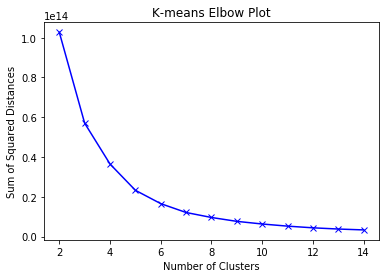

In [13]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances')
plt.title('K-means Elbow Plot')
plt.show()

In [126]:
#linear regression: entire cancer, all features
this_df = cancer2
X = this_df.drop(['Length_of_Stay'], axis=1)
y=this_df['Length_of_Stay']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
lm = LinearRegression()
model = lm.fit(X_train, y_train)

y_pred = lm.predict(X_test)
train_pred = lm.predict(X_train)
print("Train error: ", MAE(train_pred, y_train), '\n' )
print("Test error: ", MAE(y_pred, y_test), '\n')
print("Train r^2 Score:", lm.score(X_train, y_train),  '\n')
print("Test r^2 Score:", lm.score(X_test, y_test), '\n')

(26853, 394) (26853,)
(8951, 394) (8951,)
Train error:  3.329002392401777 

Test error:  3.405734564911585 

Train r^2 Score: 0.6295022433891113 

Test r^2 Score: 0.6266432319119009 



In [29]:
#huber regression :all features
this_df = cancer2
X = this_df.drop(['Length_of_Stay'], axis=1)
y=this_df['Length_of_Stay']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
lm = HuberRegressor(max_iter = 1000)  #HuberRegressor(epsilon=1.0)
model = lm.fit(X_train, y_train)

y_pred = lm.predict(X_test)
train_pred = lm.predict(X_train)
print("Train error: ", MAE(train_pred, y_train), '\n' )
print("Test error: ", MAE(y_pred, y_test), '\n')
print("Train r^2 Score:", lm.score(X_train, y_train))
print("Test r^2 Score:", lm.score(X_test, y_test))

(26853, 394) (26853,)
(8951, 394) (8951,)
Train error:  3.604983995303127 

Test error:  3.5341978373558325 

Train r^2 Score: 0.4541652315730663
Test r^2 Score: 0.4481076297094996


# Kmeans for linear regression

In [69]:
this_df = cancer2
X = cancer2.drop(['Length_of_Stay'], axis=1)
y= cancer2['Length_of_Stay']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(26853, 394) (26853,)
(8951, 394) (8951,)


In [128]:
#check linear model before cluster
lm = LinearRegression()
model = lm.fit(X_train, y_train)

y_pred = lm.predict(X_test)
train_pred = lm.predict(X_train)
print("Train error: ", MAE(train_pred, y_train), '\n' )
print("Test error: ", MAE(y_pred, y_test), '\n')
print("Train r^2 Score:", lm.score(X_train, y_train),  '\n')
print("Test r^2 Score:", lm.score(X_test, y_test), '\n')

Train error:  3.3149607434151034 

Test error:  3.451097047559017 

Train r^2 Score: 0.6314969578924325 

Test r^2 Score: 0.620451335839175 



In [70]:
from typing import Tuple

def get_clusters(X_train: pd.DataFrame, X_test: pd.DataFrame, n_clusters: int) -> Tuple[pd.DataFrame, pd.DataFrame]:
    """
    applies k-means clustering to training data to find clusters and predicts them for the test set
    """
    clustering = KMeans(n_clusters=n_clusters,  init='k-means++', max_iter = 1000 ) #n_init = 5
    clustering.fit(X_train)
    # apply the labels
    train_labels = clustering.labels_
    X_train_clstrs = X_train.copy()
    X_train_clstrs['clusters'] = train_labels
    
    # predict labels on the test set
    test_labels = clustering.predict(X_test)
    X_test_clstrs = X_test.copy()
    X_test_clstrs['clusters'] = test_labels
    return X_train_clstrs, X_test_clstrs

In [20]:
X_train_clstrs, X_test_clstrs = get_clusters(X_train, X_test, 4)

In [22]:
Xtrainclustercol = X_train_clstrs['clusters']
Xtestclustercol = X_test_clstrs['clusters']
X_test_clstrs['clusters'].loc[X_test_clstrs['clusters'] == 3] 

11129    3
27092    3
16026    3
9981     3
24256    3
        ..
1579     3
28328    3
10443    3
17437    3
30946    3
Name: clusters, Length: 7003, dtype: int32

In [23]:
#check linear regression improves by just adding cluster as column
lm = LinearRegression()
model = lm.fit(X_train_clstrs, y_train)

y_pred = lm.predict(X_test_clstrs)
train_pred = lm.predict(X_train_clstrs)
print("Train error: ", MAE(train_pred, y_train), '\n' )
print("Test error: ", MAE(y_pred, y_test), '\n')
print("Train r^2 Score:", lm.score(X_train_clstrs, y_train),  '\n')
print("Test r^2 Score:", lm.score(X_test_clstrs, y_test), '\n')

Train error:  3.4812401484375037 

Test error:  3.413005378317386 

Train r^2 Score: 0.6364630604962151 

Test r^2 Score: 0.6369765673465952 



In [24]:
#k=5
X_train_clstrs, X_test_clstrs = get_clusters(X_train, X_test, 5)
lm = LinearRegression()
model = lm.fit(X_train_clstrs, y_train)

y_pred = lm.predict(X_test_clstrs)
train_pred = lm.predict(X_train_clstrs)
print("Train error: ", MAE(train_pred, y_train), '\n' )
print("Test error: ", MAE(y_pred, y_test), '\n')
print("Train r^2 Score:", lm.score(X_train_clstrs, y_train),  '\n')
print("Test r^2 Score:", lm.score(X_test_clstrs, y_test), '\n')

Train error:  3.439048254704438 

Test error:  3.372426897424405 

Train r^2 Score: 0.6328652430843706 

Test r^2 Score: 0.6346272727544185 



In [25]:
#k=6
X_train_clstrs, X_test_clstrs = get_clusters(X_train, X_test, 6)
lm = LinearRegression()
model = lm.fit(X_train_clstrs, y_train)

y_pred = lm.predict(X_test_clstrs)
train_pred = lm.predict(X_train_clstrs)
print("Train error: ", MAE(train_pred, y_train), '\n' )
print("Test error: ", MAE(y_pred, y_test), '\n')
print("Train r^2 Score:", lm.score(X_train_clstrs, y_train),  '\n')
print("Test r^2 Score:", lm.score(X_test_clstrs, y_test), '\n')

Train error:  3.507984748689397 

Test error:  3.450882340442079 

Train r^2 Score: 0.6399730353765642 

Test r^2 Score: 0.6381095077081184 



In [27]:
#k=7
X_train_clstrs, X_test_clstrs = get_clusters(X_train, X_test, 7)
lm = LinearRegression()
model = lm.fit(X_train_clstrs, y_train)

y_pred = lm.predict(X_test_clstrs)
train_pred = lm.predict(X_train_clstrs)
print("Train error: ", MAE(train_pred, y_train), '\n' )
print("Test error: ", MAE(y_pred, y_test), '\n')
print("Train r^2 Score:", lm.score(X_train_clstrs, y_train),  '\n')
print("Test r^2 Score:", lm.score(X_test_clstrs, y_test), '\n')

Train error:  3.369959642228137 

Test error:  3.3014141484675448 

Train r^2 Score: 0.6293195483227824 

Test r^2 Score: 0.6302102731318411 



In [26]:
#k=8
X_train_clstrs, X_test_clstrs = get_clusters(X_train, X_test, 8)
lm = LinearRegression()
model = lm.fit(X_train_clstrs, y_train)

y_pred = lm.predict(X_test_clstrs)
train_pred = lm.predict(X_train_clstrs)
print("Train error: ", MAE(train_pred, y_train), '\n' )
print("Test error: ", MAE(y_pred, y_test), '\n')
print("Train r^2 Score:", lm.score(X_train_clstrs, y_train),  '\n')
print("Test r^2 Score:", lm.score(X_test_clstrs, y_test), '\n')

Train error:  3.3753115966112976 

Test error:  3.306359007914447 

Train r^2 Score: 0.6298499760957909 

Test r^2 Score: 0.6304023993226026 



In [79]:
def cluster_regression(train_clusters, test_clusters, n_clusters):
    #X_train_clstrs, X_test_clstrs = get_clusters(X_train, X_test, n_clusters)
    train_divide = [] #divideclustertrain = []
    test_divide = []

    #divide test and train patients into clusters
    for i in range(n_clusters):
        train_i = train_clusters.loc[train_clusters.clusters == i]  #df
        train_divide.append(train_i)

        test_i = test_clusters.loc[test_clusters.clusters == i]  #df
        test_divide.append(test_i)

    #for each cluster, train model on train, and run on test get accuracy
    for i in range(n_clusters):
        X_train = train_divide[i].drop(['y', 'clusters'], axis=1)
        y_train =  train_divide[i]['y']
        X_test = test_divide[i].drop(['y', 'clusters'], axis=1)
        y_test =  test_divide[i]['y']

        lm = LinearRegression()
        model = lm.fit(X_train, y_train)

        test_pred = lm.predict(X_test)
        train_pred = lm.predict(X_train)
        print("cluster: " + str(i), '\n')
        print("Number of row in train: " + str(X_train.shape[0]), '\n')
        print("Number of row in test: " + str(X_test.shape[0]), '\n')
        print("Train error: ", MAE(train_pred, y_train), '\n' )
        print("Test error: ", MAE(test_pred, y_test), '\n')
        print("Train r^2 Score:", lm.score(X_train, y_train),  '\n')
        print("Test r^2 Score:", lm.score(X_test, y_test), '\n')
    

In [81]:
X_train_clstrs, X_test_clstrs = get_clusters(X_train, X_test, 4)
train_clusters = X_train_clstrs.copy()
test_clusters = X_test_clstrs.copy()
train_clusters['y'] = y_train
test_clusters['y'] = y_test
cluster_regression(train_clusters, test_clusters, 4)

cluster: 0 

Number of row in train: 22198 

Number of row in test: 7458 

Train error:  2.1238181743434263 

Test error:  2.1586650645616765 

Train r^2 Score: 0.5658898717028634 

Test r^2 Score: 0.547617000333676 

cluster: 1 

Number of row in train: 25 

Number of row in test: 6 

Train error:  2.473052518325858e-10 

Test error:  18.371421694875416 

Train r^2 Score: 1.0 

Test r^2 Score: -0.03710475530998614 

cluster: 2 

Number of row in train: 4270 

Number of row in test: 1359 

Train error:  6.013638150760481 

Test error:  6.42303968458283 

Train r^2 Score: 0.6587027553742518 

Test r^2 Score: 0.6193367724747604 

cluster: 3 

Number of row in train: 360 

Number of row in test: 128 

Train error:  7.191845809012282 

Test error:  20.67159460193203 

Train r^2 Score: 0.8519174705374541 

Test r^2 Score: -0.5495300971645116 



In [82]:
X_train_clstrs, X_test_clstrs = get_clusters(X_train, X_test, 6)
train_clusters = X_train_clstrs.copy()
test_clusters = X_test_clstrs.copy()
train_clusters['y'] = y_train
test_clusters['y'] = y_test
cluster_regression(train_clusters, test_clusters, 6)

cluster: 0 

Number of row in train: 2704 

Number of row in test: 875 

Train error:  5.520633375780772 

Test error:  6.311525315148623 

Train r^2 Score: 0.6760659549672108 

Test r^2 Score: 0.6437746781798227 

cluster: 1 

Number of row in train: 15559 

Number of row in test: 5235 

Train error:  1.5128803370525092 

Test error:  1.5752540424487829 

Train r^2 Score: 0.5435812722603559 

Test r^2 Score: 0.4949196169928709 

cluster: 2 

Number of row in train: 179 

Number of row in test: 52 

Train error:  5.645139379751938 

Test error:  26.14203209814962 

Train r^2 Score: 0.895105664019998 

Test r^2 Score: -0.8501120811940824 

cluster: 3 

Number of row in train: 768 

Number of row in test: 250 

Train error:  8.081332781379585 

Test error:  13.037891836484404 

Train r^2 Score: 0.7506577583721955 

Test r^2 Score: 0.1678551214398879 

cluster: 4 

Number of row in train: 21 

Number of row in test: 3 

Train error:  3.973732242727801e-09 

Test error:  13.857666139955052

In [84]:
X_train_clstrs, X_test_clstrs = get_clusters(X_train, X_test, 3)
train_clusters = X_train_clstrs.copy()
test_clusters = X_test_clstrs.copy()
train_clusters['y'] = y_train
test_clusters['y'] = y_test
cluster_regression(train_clusters, test_clusters, 3)

cluster: 0 

Number of row in train: 3544 

Number of row in test: 1158 

Train error:  6.6828895694340416 

Test error:  7.190539515547176 

Train r^2 Score: 0.6742497274736186 

Test r^2 Score: 0.6206239209139545 

cluster: 1 

Number of row in train: 23092 

Number of row in test: 7735 

Train error:  2.2791897453342105 

Test error:  2.305999056084334 

Train r^2 Score: 0.5656235900401985 

Test r^2 Score: 0.5363091162833156 

cluster: 2 

Number of row in train: 217 

Number of row in test: 58 

Train error:  7.885915035087367 

Test error:  20.781881513217048 

Train r^2 Score: 0.8526136746190079 

Test r^2 Score: 0.04076603456486149 



In [97]:
from sklearn.preprocessing import StandardScaler
def scale_features(X_train: pd.DataFrame, X_test: pd.DataFrame) -> Tuple[pd.DataFrame, pd.DataFrame]:
    """
    applies standard scaler (z-scores) to training data and predicts z-scores for the test set
    """
    scaler = StandardScaler()
    to_scale = [col for col in X_train.columns.values]
    scaler.fit(X_train[to_scale])
    X_train[to_scale] = scaler.transform(X_train[to_scale])
    
    # predict z-scores on the test set
    X_test[to_scale] = scaler.transform(X_test[to_scale])
    
    return X_train, X_test


In [98]:
X_train_scaled, X_test_scaled = scale_features(X_train_clstrs, X_test_clstrs)

# filter method / pearson correlation

In [9]:
#importing libraries
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

/Users/kathy908000/anaconda3/lib/python3.7/site-packages/statsmodels/compat/pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


In [12]:
cancer2 = cancer.dropna(axis = 'columns')
cancer2 = cancer2.drop(["Unnamed: 0", 'Unnamed: 0.1', 'Unnamed: 0_1',  ], axis=1)
cancer2

,Total_Charges,APR_Severity_of_Illness_Code,APR_Risk_of_Mortality,Age_Ordinal,Length_of_Stay,Hospital_County_Bronx,Hospital_County_Kings,Hospital_County_Manhattan,Hospital_County_Queens,Hospital_County_Richmond,Type_of_Admission_Elective,Type_of_Admission_Emergency,Type_of_Admission_Newborn,Type_of_Admission_Urgent,Type_of_Admission_Not_Available,Type_of_Admission_Trauma,Patient_Disposition_Home w/ Home Health Services,Patient_Disposition_Skilled Nursing Home,Patient_Disposition_Home or Self Care,Patient_Disposition_Expired,Patient_Disposition_Left Against Medical Advice,Patient_Disposition_Short-term Hospital,Patient_Disposition_Hospice - Home,Patient_Disposition_Inpatient Rehabilitation Facility,Patient_Disposition_Medicare Cert Long Term Care Hospital,Patient_Disposition_Another Type Not Listed,Patient_Disposition_Hospice - Medical Facility,Patient_Disposition_Cancer Center or Children's Hospital,Patient_Disposition_Facility w/ Custodial/Supportive Care,Patient_Disposition_Federal Health Care Facility,Patient_Disposition_Hosp Basd Medicare Approved Swing Bed,Patient_Disposition_Psychiatric Hospital or Unit of Hosp,Patient_Disposition_Medicaid Cert Nursing Facility,Patient_Disposition_Court/Law Enforcement,CCS_Diagnosis_Code_12,CCS_Diagnosis_Code_32,CCS_Diagnosis_Code_19,CCS_Diagnosis_Code_21,CCS_Diagnosis_Code_15,CCS_Diagnosis_Code_11,CCS_Diagnosis_Code_26,CCS_Diagnosis_Code_28,CCS_Diagnosis_Code_33,CCS_Diagnosis_Code_27,CCS_Diagnosis_Code_14,CCS_Diagnosis_Code_18,CCS_Diagnosis_Code_24,CCS_Diagnosis_Code_25,CCS_Diagnosis_Code_36,CCS_Diagnosis_Code_35,CCS_Diagnosis_Code_13,CCS_Diagnosis_Code_16,CCS_Diagnosis_Code_29,CCS_Diagnosis_Code_20,CCS_Diagnosis_Code_17,CCS_Diagnosis_Code_41,CCS_Diagnosis_Code_23,CCS_Diagnosis_Code_31,CCS_Diagnosis_Code_34,CCS_Diagnosis_Code_30,CCS_Procedure_Code_94,CCS_Procedure_Code_112,CCS_Procedure_Code_224,CCS_Procedure_Code_37,CCS_Procedure_Code_54,CCS_Procedure_Code_78,CCS_Procedure_Code_222,CCS_Procedure_Code_70,CCS_Procedure_Code_0,CCS_Procedure_Code_104,CCS_Procedure_Code_101,CCS_Procedure_Code_119,CCS_Procedure_Code_36,CCS_Procedure_Code_125,CCS_Procedure_Code_76,CCS_Procedure_Code_124,CCS_Procedure_Code_39,CCS_Procedure_Code_95,CCS_Procedure_Code_103,CCS_Procedure_Code_10,CCS_Procedure_Code_97,CCS_Procedure_Code_132,CCS_Procedure_Code_130,CCS_Procedure_Code_216,CCS_Procedure_Code_67,CCS_Procedure_Code_83,CCS_Procedure_Code_167,CCS_Procedure_Code_114,CCS_Procedure_Code_113,CCS_Procedure_Code_7,CCS_Procedure_Code_73,CCS_Procedure_Code_169,CCS_Procedure_Code_159,CCS_Procedure_Code_1,CCS_Procedure_Code_38,CCS_Procedure_Code_231,CCS_Procedure_Code_71,CCS_Procedure_Code_82,CCS_Procedure_Code_99,CCS_Procedure_Code_223,CCS_Procedure_Code_93,CCS_Procedure_Code_61,CCS_Procedure_Code_88,CCS_Procedure_Code_34,CCS_Procedure_Code_96,CCS_Procedure_Code_40,CCS_Procedure_Code_74,CCS_Procedure_Code_228,CCS_Procedure_Code_77,CCS_Procedure_Code_110,CCS_Procedure_Code_178,CCS_Procedure_Code_98,CCS_Procedure_Code_179,CCS_Procedure_Code_174,CCS_Procedure_Code_69,CCS_Procedure_Code_21,CCS_Procedure_Code_165,CCS_Procedure_Code_116,CCS_Procedure_Code_198,CCS_Procedure_Code_42,CCS_Procedure_Code_215,CCS_Procedure_Code_166,CCS_Procedure_Code_227,CCS_Procedure_Code_50,CCS_Procedure_Code_33,CCS_Procedure_Code_196,CCS_Procedure_Code_170,CCS_Procedure_Code_90,CCS_Procedure_Code_213,CCS_Procedure_Code_19,CCS_Procedure_Code_173,CCS_Procedure_Code_9,CCS_Procedure_Code_177,CCS_Procedure_Code_58,CCS_Procedure_Code_75,CCS_Procedure_Code_207,CCS_Procedure_Code_209,CCS_Procedure_Code_142,CCS_Procedure_Code_35,CCS_Procedure_Code_157,CCS_Procedure_Code_175,CCS_Procedure_Code_211,CCS_Procedure_Code_64,CCS_Procedure_Code_118,CCS_Procedure_Code_89,CCS_Procedure_Code_2,CCS_Procedure_Code_164,CCS_Procedure_Code_210,CCS_Procedure_Code_31,CCS_Procedure_Code_176,CCS_Procedure_Code_172,CCS_Procedure_Code_197,CCS_Procedure_Code_23,CCS_Procedure_Code_28,CCS_Procedure_Code_4,CCS_Procedure_Code_32,CCS_Procedure_Code_208,CCS_Procedure_Code_84,CC

In [14]:
#Using Pearson Correlation
cor = cancer2.corr()
plt.figure(figsize=(12,10))
#sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
#plt.show()

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

In [15]:
cor

,Total_Charges,APR_Severity_of_Illness_Code,APR_Risk_of_Mortality,Age_Ordinal,Length_of_Stay,Hospital_County_Bronx,Hospital_County_Kings,Hospital_County_Manhattan,Hospital_County_Queens,Hospital_County_Richmond,Type_of_Admission_Elective,Type_of_Admission_Emergency,Type_of_Admission_Newborn,Type_of_Admission_Urgent,Type_of_Admission_Not_Available,Type_of_Admission_Trauma,Patient_Disposition_Home w/ Home Health Services,Patient_Disposition_Skilled Nursing Home,Patient_Disposition_Home or Self Care,Patient_Disposition_Expired,Patient_Disposition_Left Against Medical Advice,Patient_Disposition_Short-term Hospital,Patient_Disposition_Hospice - Home,Patient_Disposition_Inpatient Rehabilitation Facility,Patient_Disposition_Medicare Cert Long Term Care Hospital,Patient_Disposition_Another Type Not Listed,Patient_Disposition_Hospice - Medical Facility,Patient_Disposition_Cancer Center or Children's Hospital,Patient_Disposition_Facility w/ Custodial/Supportive Care,Patient_Disposition_Federal Health Care Facility,Patient_Disposition_Hosp Basd Medicare Approved Swing Bed,Patient_Disposition_Psychiatric Hospital or Unit of Hosp,Patient_Disposition_Medicaid Cert Nursing Facility,Patient_Disposition_Court/Law Enforcement,CCS_Diagnosis_Code_12,CCS_Diagnosis_Code_32,CCS_Diagnosis_Code_19,CCS_Diagnosis_Code_21,CCS_Diagnosis_Code_15,CCS_Diagnosis_Code_11,CCS_Diagnosis_Code_26,CCS_Diagnosis_Code_28,CCS_Diagnosis_Code_33,CCS_Diagnosis_Code_27,CCS_Diagnosis_Code_14,CCS_Diagnosis_Code_18,CCS_Diagnosis_Code_24,CCS_Diagnosis_Code_25,CCS_Diagnosis_Code_36,CCS_Diagnosis_Code_35,CCS_Diagnosis_Code_13,CCS_Diagnosis_Code_16,CCS_Diagnosis_Code_29,CCS_Diagnosis_Code_20,CCS_Diagnosis_Code_17,CCS_Diagnosis_Code_41,CCS_Diagnosis_Code_23,CCS_Diagnosis_Code_31,CCS_Diagnosis_Code_34,CCS_Diagnosis_Code_30,CCS_Procedure_Code_94,CCS_Procedure_Code_112,CCS_Procedure_Code_224,CCS_Procedure_Code_37,CCS_Procedure_Code_54,CCS_Procedure_Code_78,CCS_Procedure_Code_222,CCS_Procedure_Code_70,CCS_Procedure_Code_0,CCS_Procedure_Code_104,CCS_Procedure_Code_101,CCS_Procedure_Code_119,CCS_Procedure_Code_36,CCS_Procedure_Code_125,CCS_Procedure_Code_76,CCS_Procedure_Code_124,CCS_Procedure_Code_39,CCS_Procedure_Code_95,CCS_Procedure_Code_103,CCS_Procedure_Code_10,CCS_Procedure_Code_97,CCS_Procedure_Code_132,CCS_Procedure_Code_130,CCS_Procedure_Code_216,CCS_Procedure_Code_67,CCS_Procedure_Code_83,CCS_Procedure_Code_167,CCS_Procedure_Code_114,CCS_Procedure_Code_113,CCS_Procedure_Code_7,CCS_Procedure_Code_73,CCS_Procedure_Code_169,CCS_Procedure_Code_159,CCS_Procedure_Code_1,CCS_Procedure_Code_38,CCS_Procedure_Code_231,CCS_Procedure_Code_71,CCS_Procedure_Code_82,CCS_Procedure_Code_99,CCS_Procedure_Code_223,CCS_Procedure_Code_93,CCS_Procedure_Code_61,CCS_Procedure_Code_88,CCS_Procedure_Code_34,CCS_Procedure_Code_96,CCS_Procedure_Code_40,CCS_Procedure_Code_74,CCS_Procedure_Code_228,CCS_Procedure_Code_77,CCS_Procedure_Code_110,CCS_Procedure_Code_178,CCS_Procedure_Code_98,CCS_Procedure_Code_179,CCS_Procedure_Code_174,CCS_Procedure_Code_69,CCS_Procedure_Code_21,CCS_Procedure_Code_165,CCS_Procedure_Code_116,CCS_Procedure_Code_198,CCS_Procedure_Code_42,CCS_Procedure_Code_215,CCS_Procedure_Code_166,CCS_Procedure_Code_227,CCS_Procedure_Code_50,CCS_Procedure_Code_33,CCS_Procedure_Code_196,CCS_Procedure_Code_170,CCS_Procedure_Code_90,CCS_Procedure_Code_213,CCS_Procedure_Code_19,CCS_Procedure_Code_173,CCS_Procedure_Code_9,CCS_Procedure_Code_177,CCS_Procedure_Code_58,CCS_Procedure_Code_75,CCS_Procedure_Code_207,CCS_Procedure_Code_209,CCS_Procedure_Code_142,CCS_Procedure_Code_35,CCS_Procedure_Code_157,CCS_Procedure_Code_175,CCS_Procedure_Code_211,CCS_Procedure_Code_64,CCS_Procedure_Code_118,CCS_Procedure_Code_89,CCS_Procedure_Code_2,CCS_Procedure_Code_164,CCS_Procedure_Code_210,CCS_Procedure_Code_31,CCS_Procedure_Code_176,CCS_Procedure_Code_172,CCS_Procedure_Code_197,CCS_Procedure_Code_23,CCS_Procedure_Code_28,CCS_Procedure_Code_4,CCS_Procedure_Code_32,CCS_Procedure_Code_208,CCS_Procedure_Code_84,CC

In [20]:
cor['Length_of_Stay']

Total_Charges                   0.689960
APR_Severity_of_Illness_Code    0.441401
APR_Risk_of_Mortality           0.414445
Age_Ordinal                     0.100739
Length_of_Stay                  1.000000
                                  ...   
Race_White                     -0.041609
Race_Unknown                   -0.002244
Ethnicity_Not Span/Hispanic    -0.034425
Ethnicity_Spanish/Hispanic      0.033221
Ethnicity_Unknown               0.007910
Name: Length_of_Stay, Length: 395, dtype: float64

In [23]:
#only select features which has correlation of above 0.5 (taking absolute value)
loscor = abs(cor['Length_of_Stay'])
relevant_features = loscor[loscor>0.2]
relevant_features

Total_Charges                               0.689960
APR_Severity_of_Illness_Code                0.441401
APR_Risk_of_Mortality                       0.414445
Length_of_Stay                              1.000000
Hospital_County_Bronx                       0.220251
Patient_Disposition_Skilled Nursing Home    0.205673
Patient_Disposition_Home or Self Care       0.345098
Patient_Disposition_Expired                 0.284448
APR_DRG_Code_4                              0.236865
Name: Length_of_Stay, dtype: float64

# Kmeans 

In [49]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
#from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# elbowplot cancerlos

In [52]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(cancerlos)
    Sum_of_squared_distances.append(km.inertia_)

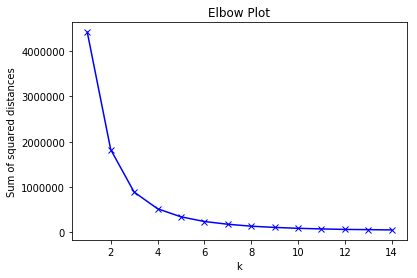

In [53]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Cancerlos Elbow Plot')
plt.show()

# elbowplot feature

In [48]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(cancerfeature)
    Sum_of_squared_distances.append(km.inertia_)

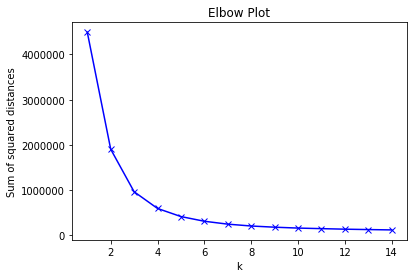

In [52]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Plot')
plt.show()


# The silhouette coefficient 
#is a measure of cluster cohesion and separation. It quantifies how well a data point fits into its assigned cluster based on two factors:

In [56]:
 silhouette_coefficients = []
# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(cancerfeature)
    score = silhouette_score(cancerfeature, kmeans.labels_)
    silhouette_coefficients.append(score)

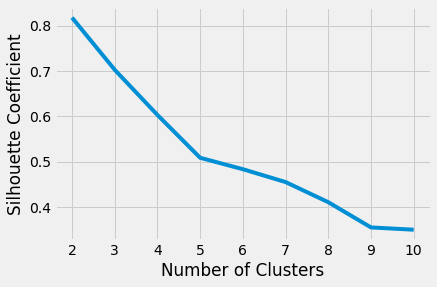

In [57]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [56]:
#cancerlos silhouette
silhouette_coefficients = []
# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(cancerlos)
    score = silhouette_score(cancerlos, kmeans.labels_)
    silhouette_coefficients.append(score)

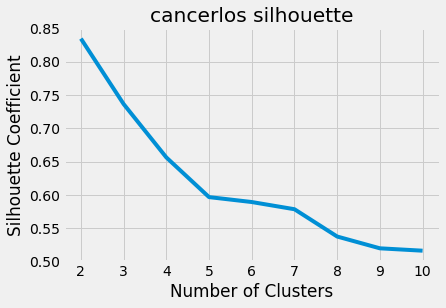

In [57]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.title("cancerlos silhouette")
plt.show()

# Kmeans (data 2D)

In [20]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

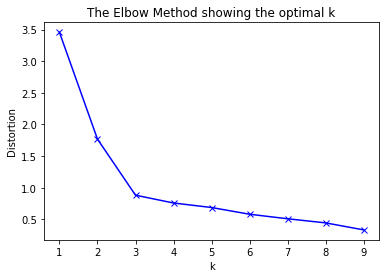

In [25]:
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

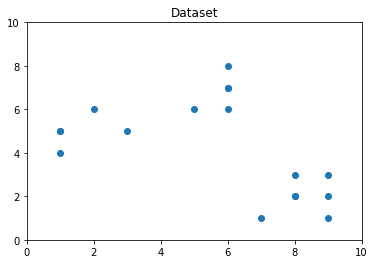

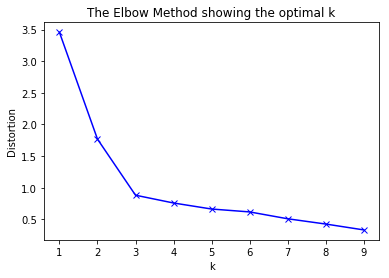

In [26]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

x1 = np.array([3, 1, 1, 2, 1, 6, 6, 6, 5, 6, 7, 8, 9, 8, 9, 9, 8])
x2 = np.array([5, 4, 5, 6, 5, 8, 6, 7, 6, 7, 1, 2, 1, 2, 3, 2, 3])

plt.plot()
plt.xlim([0, 10])
plt.ylim([0, 10])
plt.title('Dataset')
plt.scatter(x1, x2)
plt.show()

# create new plot and data
plt.plot()
X = np.array(list(zip(x1, x2))).reshape(len(x1), 2)
colors = ['b', 'g', 'r']
markers = ['o', 'v', 's']

# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

# Linear Regression

In [42]:
#linear regression: entire cancer, midterm features
this_df = cancerfeature
X = this_df.drop(['Length_of_Stay'], axis=1)
y=this_df['Length_of_Stay']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
lm = LinearRegression()
model = lm.fit(X_train, y_train)

y_pred = lm.predict(X_test)
train_pred = lm.predict(X_train)
print("Train error: ", MAE(train_pred, y_train), '\n' )
print("Test error: ", MAE(y_pred, y_test), '\n')
print("r^2 Score:", lm.score(X_test, y_test))

(26853, 34) (26853,)
(8951, 34) (8951,)
Train error:  5.008185452466321 

Test error:  5.01123295079635 

r^2 Score: 0.22415578773679057


In [46]:
#linear regression: entire cancer, pearson correaltion features
this_df = cancer2
X = this_df[['Total_Charges', 'APR_Severity_of_Illness_Code', 'APR_Risk_of_Mortality', 'Hospital_County_Bronx', 'Patient_Disposition_Skilled Nursing Home', 'Patient_Disposition_Home or Self Care', 'Patient_Disposition_Expired', 
             'APR_DRG_Code_4']]
            
y = this_df['Length_of_Stay']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
lm = LinearRegression()
model = lm.fit(X_train, y_train)

y_pred = lm.predict(X_test)
train_pred = lm.predict(X_train)
print("Train error: ", MAE(train_pred, y_train), '\n' )
print("Test error: ", MAE(y_pred, y_test), '\n')
print("r^2 Score:", lm.score(X_test, y_test)) #lm.score(X, y)



(26853, 8) (26853,)
(8951, 8) (8951,)
Train error:  3.485961430906258 

Test error:  3.5518385740130696 

r^2 Score: 0.5814800581827184


# Huber Regression

In [55]:
this_df = cancer2
X = this_df.drop(['Length_of_Stay'], axis=1)
y=this_df['Length_of_Stay']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
lm = HuberRegressor()  #HuberRegressor(epsilon=1.0)
model = lm.fit(X_train, y_train)

y_pred = lm.predict(X_test)
train_pred = lm.predict(X_train)
print("Train error: ", MAE(train_pred, y_train), '\n' )
print("Test error: ", MAE(y_pred, y_test), '\n')
print("r^2 Score:", lm.score(X, y))

(26853, 394) (26853,)
(8951, 394) (8951,)
Train error:  3.597387155902692 

Test error:  3.5569751075301963 

r^2 Score: 0.45273664675673086


In [51]:
#linear regression: entire cancer, midterm features
this_df = cancerfeature
X = this_df.drop(['Length_of_Stay'], axis=1)
y=this_df['Length_of_Stay']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
lm = HuberRegressor()
model = lm.fit(X_train, y_train)

y_pred = lm.predict(X_test)
train_pred = lm.predict(X_train)
print("Train error: ", MAE(train_pred, y_train), '\n' )
print("Test error: ", MAE(y_pred, y_test), '\n')
print("r^2 Score:", lm.score(X, y))

(26853, 34) (26853,)
(8951, 34) (8951,)
Train error:  4.344040517622121 

Test error:  4.461757080983344 

r^2 Score: 0.14834164105990866


/Users/kathy908000/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [56]:
#huber regression: entire cancer, pearson correaltion features
this_df = cancer2
X = this_df[['Total_Charges', 'APR_Severity_of_Illness_Code', 'APR_Risk_of_Mortality', 'Hospital_County_Bronx', 'Patient_Disposition_Skilled Nursing Home', 'Patient_Disposition_Home or Self Care', 'Patient_Disposition_Expired', 
             'APR_DRG_Code_4']]
            
y = this_df['Length_of_Stay']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
lm = HuberRegressor()
model = lm.fit(X_train, y_train)

y_pred = lm.predict(X_test)
train_pred = lm.predict(X_train)
print("Train error: ", MAE(train_pred, y_train), '\n' )
print("Test error: ", MAE(y_pred, y_test), '\n')
print("r^2 Score:", lm.score(X, y))


(26853, 8) (26853,)
(8951, 8) (8951,)
Train error:  3.588499671449779 

Test error:  3.5838483494593256 

r^2 Score: 0.4528624300147759


# Random forest regression

In [65]:
#linear regression: entire cancer, all features
#overfitting train error much smaller than test error
this_df = cancer2
X = this_df.drop(['Length_of_Stay'], axis=1)
y=this_df['Length_of_Stay']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
lm = RandomForestRegressor(n_estimators = 250)
model = lm.fit(X_train, y_train)

y_pred = lm.predict(X_test)
train_pred = lm.predict(X_train)
trainmae = MAE(train_pred, y_train)
testmae = MAE(y_pred, y_test)
r2 = lm.score(X, y)
print("Train error: ", MAE(train_pred, y_train), '\n' )
print("Test error: ", MAE(y_pred, y_test), '\n')
print("Train r^2 Score:", lm.score(X_train, y_train))
print("Test r^2 Score:", lm.score(X_test, y_test))

(26853, 394) (26853,)
(8951, 394) (8951,)
Train error:  0.7063743492347223 

Test error:  1.9031051875023277 

r^2 Score: 0.9516152771676278


In [10]:
testmse = MSE(y_pred, y_test)
testmse

17.02841752295833

# Function for regression training

In [33]:
def train_LR(X_train, X_test, y_train, y_test, i):
    # create training and testing vars
    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
    print(X_train.shape, y_train.shape)
    print(X_test.shape, y_test.shape)
    lm = LinearRegression()
    model = lm.fit(X_train, y_train)
    
    y_pred = lm.predict(X_test)
    train_pred = lm.predict(X_train)
    print("Train error: ", MAE(train_pred, y_train), '\n' )
    print("Test error: ", MAE(y_pred, y_test), '\n')
    print("r^2 Score:", lm.score(X_test, y_test))
    
    #print("Score:", MSE(y_pred, y_test), '\n')
    #print(confusion_matrix(y_test, y_pred))
    #print(classification_report(y_test, y_pred))

In [34]:
def train_DT(X_train, X_test, y_train, y_test, i):
    # create training and testing vars
    print(X_train.shape, y_train.shape)
    print(X_test.shape, y_test.shape)
    dt = DecisionTreeRegressor()
    model = dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    
    print("Score:", MAE(y_pred, y_test), '\n')
    #print("Score:", MSE(y_pred, y_test), '\n')
    #print(confusion_matrix(y_test, y_pred))
    #print(classification_report(y_test, y_pred))

In [35]:
def train_RT(X_train, X_test, y_train, y_test, i):
        
    print(X_train.shape, y_train.shape)
    print(X_test.shape, y_test.shape)
    lm = RandomForestRegressor(n_estimators = 250)
    model = lm.fit(X_train, y_train)
    
    y_pred = lm.predict(X_test)
    train_pred = lm.predict(X_train)
    print("Train error: ", MAE(train_pred, y_train), '\n' )
    print("Test error: ", MAE(y_pred, y_test), '\n')
    print("r^2 Score:", lm.score(X_test, y_test))
    

In [36]:
#split data into clusters
def trainModel(df_clus, df_pat, size):
    
    #transpose
    df_clus = df_clus.transpose()
    
    # get the clusters
    clusters = []
    for i in range(size):
        this_cluster = df_clus[df_clus[i] == 1]
        clusters.append(this_cluster)
    
    
    # get the index (SubjectID)
    cluster = []
    for i in range(size):
        this_cluster = list(map(lambda x: int(x[1:]) - 1, list(clusters[i].index)))
        cluster.append(this_cluster)
        
        
    # split the patient dataframe
    pat_clustered = []
    for i in range(size):
        this_clu = df_pat[df_pat.index.isin(cluster[i])]
        pat_clustered.append(this_clu)
    
    print("The number of patients in the frist 3 clusters")
    print( len(pat_clustered[0]))  
    print( len(pat_clustered[1])) 
    print( len(pat_clustered[2])) 
    
    
    for i in range(size):
        this_c = pat_clustered[i]
        if (len(this_c) > 0):
            
            this_df = this_c
            X = this_df.drop(['Length_of_Stay'], axis=1)
            y=this_df['Length_of_Stay']
             #this_c.iloc[:, 2:] for 
            #y = this_df.LOS
            #X = this_df.iloc[:, 1:]
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
            print('\n Cluster '+ str(i+1)+ ': \n')
            print('Linear Regression: ')
            train_LR(X_train, X_test, y_train, y_test, i)
            print("Random Forest Regression: ")
            train_RT(X_train, X_test, y_train, y_test, i)
            
            #print('Decision Tree: ')
            #train_DT(X_train, X_test, y_train, y_test, i)
        else:
            print('Cluster'+ str(i+1)+ ' is empty. \n')

In [37]:
def clusterstd(df_clus, df_pat, size):
    df_clus = df_clus.transpose()
    
    # get the clusters
    clusters = []
    for i in range(size):
        this_cluster = df_clus[df_clus[i] == 1]
        clusters.append(this_cluster)
    #print(clusters)
    
    # get the index
    cluster = []
    for i in range(size):
        this_cluster = list(map(lambda x: int(x[1:]) - 1, list(clusters[i].index)))
        cluster.append(this_cluster)
        
    # split the patient dataframe
    pat_clustered = []
    for i in range(size):
        this_clu = df_pat[df_pat.index.isin(cluster[i])]
        pat_clustered.append(this_clu)
    
    print("The number of patients in the frist 3 clusters")
    print( len(pat_clustered[0]))  
    print( len(pat_clustered[1])) 
    print( len(pat_clustered[2])) 
        
    for i in range(size):
        this_c = pat_clustered[i]
        if (len(this_c) > 0):
            
            this_df = this_c
            X = this_df.drop(['Length_of_Stay'], axis=1)
            y=this_df['Length_of_Stay']
            #y = this_df.LOS
            #X = this_df.iloc[:, 1:]
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
            print('\n Cluster '+ str(i+1)+ ': \n')
            print('Linear Regression: ')
            train_LR(X_train, X_test, y_train, y_test, i)
            print("Random Forest Regression: ")
            train_RT(X_train, X_test, y_train, y_test, i)
            
            #print('Decission Tree: ')
           # train_DT(X_train, X_test, y_train, y_test, i)
        else:
            print('Cluster'+ str(i+1)+ ' is empty. \n')
    
    for i in range(size):
        print('\n Cluster' + str(i+1) + 'Summary Statistics \n')
        print(pat_clustered[i]['Length_of_Stay'].describe())
        
        
        #print(pat_clustered[i].describe())


In [44]:
clusterstd(diff4los, cancerlos, 4)

The number of patients in the frist 3 clusters
4268
1588
29934

 Cluster 1: 

Linear Regression: 
(3201, 1) (3201,)
(1067, 1) (1067,)
Train error:  4.425583105582007 

Test error:  4.258506369243541 

Decission Tree: 
(3201, 1) (3201,)
(1067, 1) (1067,)
Score: 4.048125079261904 


 Cluster 2: 

Linear Regression: 
(1191, 1) (1191,)
(397, 1) (397,)
Train error:  17.450869245690804 

Test error:  17.777380837260054 

Decission Tree: 
(1191, 1) (1191,)
(397, 1) (397,)
Score: 17.799893736128514 


 Cluster 3: 

Linear Regression: 
(22450, 1) (22450,)
(7484, 1) (7484,)
Train error:  2.9180753069877987 

Test error:  2.9456038513994294 

Decission Tree: 
(22450, 1) (22450,)
(7484, 1) (7484,)
Score: 2.939241582115184 


 Cluster 4: 

Linear Regression: 
(10, 1) (10,)
(4, 1) (4,)
Train error:  2.464285714285714 

Test error:  3.625000000000001 

Decission Tree: 
(10, 1) (10,)
(4, 1) (4,)
Score: 3.875 


 Cluster1Summary Statistics 

count    4268.000000
mean        8.147844
std         6.48149

In [46]:
trainModel(diff4entire, cancerfeature, 4)

The number of patients in the frist 3 clusters
9297
8677
9047

 Cluster 1: 

Linear Regression: 
(6972, 34) (6972,)
(2325, 34) (2325,)
Train error:  6.036398383713425 

Test error:  5.780099126344086 

Decision Tree: 
(6972, 34) (6972,)
(2325, 34) (2325,)
Score: 5.538251182234659 


 Cluster 2: 

Linear Regression: 
(6507, 34) (6507,)
(2170, 34) (2170,)
Train error:  4.606309716248685 

Test error:  4.346196358026367 

Decision Tree: 
(6507, 34) (6507,)
(2170, 34) (2170,)
Score: 4.0734114152891125 


 Cluster 3: 

Linear Regression: 
(6785, 34) (6785,)
(2262, 34) (2262,)
Train error:  4.680632038158622 

Test error:  4.934097357496132 

Decision Tree: 
(6785, 34) (6785,)
(2262, 34) (2262,)
Score: 4.820764553893943 


 Cluster 4: 

Linear Regression: 
(6587, 34) (6587,)
(2196, 34) (2196,)
Train error:  4.670304672081373 

Test error:  4.639445654030054 

Decision Tree: 
(6587, 34) (6587,)
(2196, 34) (2196,)
Score: 4.441097370588909 



In [26]:
clusterstd(diff4entire, cancerfeature, 4)

The number of patients in the frist 3 clusters
9297
8677
9047

 Cluster 1: 

Linear Regression: 
(6972, 34) (6972,)
(2325, 34) (2325,)
Train error:  5.898461031626506 

Test error:  6.091448042674731 

Decission Tree: 
(6972, 34) (6972,)
(2325, 34) (2325,)
Score: 5.964996814882212 


 Cluster 2: 

Linear Regression: 
(6507, 34) (6507,)
(2170, 34) (2170,)
Train error:  4.593365186526187 

Test error:  4.296618733518841 

Decission Tree: 
(6507, 34) (6507,)
(2170, 34) (2170,)
Score: 4.081777156413631 


 Cluster 3: 

Linear Regression: 
(6785, 34) (6785,)
(2262, 34) (2262,)
Train error:  4.733326004916636 

Test error:  4.818761257235715 

Decission Tree: 
(6785, 34) (6785,)
(2262, 34) (2262,)
Score: 4.502722023686777 


 Cluster 4: 

Linear Regression: 
(6587, 34) (6587,)
(2196, 34) (2196,)
Train error:  4.632825546531046 

Test error:  4.6793424123406195 

Decission Tree: 
(6587, 34) (6587,)
(2196, 34) (2196,)
Score: 4.461673405908673 


 Cluster1Summary Statistics 

count    9297.0000

In [17]:
trainModel(diff3entire, cancerfeature, 3)

The number of patients in the frist 3 clusters
12119
12146
11539

 Cluster 1: 

Linear Regression: 
(9089, 34) (9089,)
(3030, 34) (3030,)
Train error:  4.705996620496359 

Test error:  4.574124679313634 

Decision Tree: 
(9089, 34) (9089,)
(3030, 34) (3030,)
Score: 4.3383788561958 


 Cluster 2: 

Linear Regression: 
(9109, 34) (9109,)
(3037, 34) (3037,)
Train error:  6.0329955558848045 

Test error:  5.557826198242509 

Decision Tree: 
(9109, 34) (9109,)
(3037, 34) (3037,)
Score: 5.327142127138007 


 Cluster 3: 

Linear Regression: 
(8654, 34) (8654,)
(2885, 34) (2885,)
Train error:  4.579625389993067 

Test error:  4.305896609618718 

Decision Tree: 
(8654, 34) (8654,)
(2885, 34) (2885,)
Score: 4.108193567001169 



In [46]:
trainModel(diff3, dfsamplefeat, 3)
#trainModel(Xwp3, df_pat, 3)

Cluster1 is empty. 


 Cluster 2: 

Linear Regression: 
(4823, 4) (4823,)
(1608, 4) (1608,)
Score: 28.14944856208815 

Decision Tree: 
(4823, 4) (4823,)
(1608, 4) (1608,)
Score: 65.57213930348259 


 Cluster 3: 

Linear Regression: 
(4823, 4) (4823,)
(1608, 4) (1608,)
Score: 34.29473848650537 

Decision Tree: 
(4823, 4) (4823,)
(1608, 4) (1608,)
Score: 51.97139303482587 



In [104]:
trainModel(diff4, dfsamplefeat, 4)


 Cluster 1: 

Linear Regression: 
(4823, 4) (4823,)
(1608, 4) (1608,)
Score: 31.124138695243598 

Decision Tree: 
(4823, 4) (4823,)
(1608, 4) (1608,)
Score: 49.135572139303484 

Cluster2 is empty. 

Cluster3 is empty. 


 Cluster 4: 

Linear Regression: 
(4823, 4) (4823,)
(1608, 4) (1608,)
Score: 30.974572560092007 

Decision Tree: 
(4823, 4) (4823,)
(1608, 4) (1608,)
Score: 58.17910447761194 



In [69]:
trainModel(cancer3diff15000, dfsamplefeat2, 3)

The number of patients in the frist 3 clusters
4784
5174
5042

 Cluster 1: 

Linear Regression: 
(11250, 34) (11250,)
(3750, 34) (3750,)
Score: 4.907007291666667 

Decision Tree: 
(11250, 34) (11250,)
(3750, 34) (3750,)
Score: 4.665468212844499 


 Cluster 2: 

Linear Regression: 
(11250, 34) (11250,)
(3750, 34) (3750,)
Score: 4.971551953125 

Decision Tree: 
(11250, 34) (11250,)
(3750, 34) (3750,)
Score: 4.70087097630484 


 Cluster 3: 

Linear Regression: 
(11250, 34) (11250,)
(3750, 34) (3750,)
Score: 5.2512350810154205 

Decision Tree: 
(11250, 34) (11250,)
(3750, 34) (3750,)
Score: 5.008571431152368 

